In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

data_url = "https://www.sentiweb.fr/datasets/incidence-PAY-7.csv"
raw_data = pd.read_csv(data_url, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202019          7    312        0     757       0           0   
1     202018          7    849       98    1600       1           0   
2     202017          7    272        0     658       0           0   
3     202016          7    758       78    1438       1           0   
4     202015          7   1918      675    3161       3           1   
...      ...        ...    ...      ...     ...     ...         ...   
1531  199101          7  15565    10271   20859      27          18   
1532  199052          7  19375    13295   25455      34          23   
1533  199051          7  19080    13807   24353      34          25   
1534  199050          7  11079     6660   15498      20          12   
1535  199049          7   1143        0    2610       2           0   

      inc100_up geo_insee geo_name  
0             1        FR   France  
1             2        FR   France  
2             1        FR   France  
3             2        FR   France  
4             5        FR   France  
...         ...       ...      ...  
1531         36        FR   France  
1532         45        FR   France  
1533         43        FR   France  
1534         28        FR   France  
1535          5        FR   France  

[1536 rows x 10 columns]

missing cells?

In [3]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

looks good! - convert it now

In [4]:
data = raw_data

def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

sorted_data = data.set_index('period').sort_index()

some validation:

In [5]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

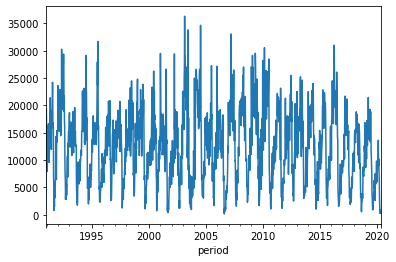

In [6]:
sorted_data['inc'].plot()

In [7]:
first_january_week = [pd.Period(pd.Timestamp(y, 1, 1), 'W')
                     for y in range(1990,
                                    sorted_data.index[-1].year)]
year = []
yearly_incidence = []
for week1, week2 in zip(first_january_week[:-1],
                        first_january_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    if not (abs(len(one_year)-52) < 2):
        print(week1, week2, len(one_year))
        
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

yearly_incidence.plot(style='*')

1990-01-01/1990-01-07 1990-12-31/1991-01-06 4


AssertionError: 

 ... in 1990 there are some weeks missing... so leave this year out

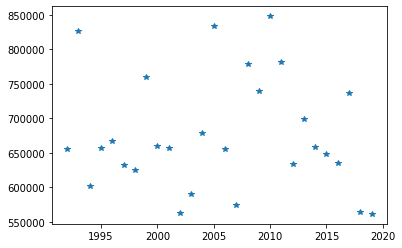

In [8]:
first_january_week = [pd.Period(pd.Timestamp(y, 1, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]
year = []
yearly_incidence = []
for week1, week2 in zip(first_january_week[:-1],
                        first_january_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    if not (abs(len(one_year)-52) < 2):
        print(week1, week2, len(one_year))
        
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

yearly_incidence.plot(style='*')

zoom:

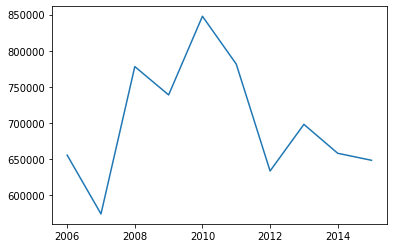

In [9]:
yearly_incidence[2005-1991:2015-1991].plot()

In [11]:
yearly_incidence.min(), yearly_incidence.argmin()

(561400, 27)

In [13]:
yearly_incidence

1992    656000
1993    825671
1994    601390
1995    657596
1996    667294
1997    632212
1998    624302
1999    760258
2000    660461
2001    656975
2002    563415
2003    589547
2004    678928
2005    832896
2006    655727
2007    574493
2008    778119
2009    738993
2010    847724
2011    781579
2012    633840
2013    698277
2014    658318
2015    648607
2016    635356
2017    736724
2018    564245
2019    561400
dtype: int64